<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

In [6]:
class WeatherDatabase:

    def __init__(self, filename = None):
        self.filename = WeatherDatabase

    def get_observation(self, date):
        self.date = date
        words = open(WeatherDatabase, 'r')
        date = input('')
        for date in WeatherDatabase:
            if date in line:
                return line

    def get_average_temp(self):
        self.avg_temp = avg_temp
        with open('weather.dat', 'r') as f:
            for line in f:
            #print(repr(line))
                f.close()
                line = line.strip()
                columns = line.split()
                date = columns[0]
                temp = columns[1]
                print(temp)

    def get_min_temp(self):
        self.min_temp = min_temp

    def get_max_temp(self):
        self.max_temp = max_temp

    def get_coldest_days(self):
        self.cold_day = cold_day

    def get_hottest_days(self):
        self.hot_day = hot_day

    def histogram(self):
        self.histogram = histogram

    def report(self):
        self.report = report

if __name__ == "__main__":
    database = WeatherDatabase("weather.dat")
    database(get_observation)
#     print(database.report())

NameError: name 'get_observation' is not defined

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`
   3. sort lists of dated files even if they are sorted correctly by default on your machine

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Michael Murdock**

<img style="float: left;" src="colored-bar.png"/>

---

# Spatial Vector Data in Python: Mapping the San Joaquin Experimental Range

In this assignment, you will create maps using vector data (shapefiles). You can download most of the data using the `'spatial-vector-lidar'` `earthpy` data subset. You will be given instructions for downloading the remaining data from [Natural Earth Data](https://www.naturalearthdata.com/). 

Some of the maps are of an area in California called the [San Joaquin Experimental Range](https://www.neonscience.org/field-sites/field-sites-map/SJER) known by the acronym SJER. [Access spatial data about NEON sites and sampling locations here](https://www.neonscience.org/data-samples/data/spatial-data-maps).

You will also create a global population *chloropleth* map. In this type of visualization, areas on the map will be colored according to their population value.

The road, boundary, and population data for all the maps comes from Natural Earth Data. Much of this has been downloaded for you, but you will download one dataset yourself.

## Data Citation

Look through the Natural Earth Data and NEON Spatial Data Maps websites above and cite the data as recommended by those organizations, or in an APA style. 

NEON (National Ecological Observatory Network). Field Site Locations, UPDATED-2020. https://www.neonscience.org/sites/default/files/NEON_Field_Sites_KMZ_v17.kmz. Dataset accessed from https://data.neonscience.org on October 10, 2022

NEON (National Ecological Observatory Network). Terrestrial Observation System Sampling Locations, UPDATED-2021, . https://www.neonscience.org/sites/default/files/All_NEON_TOS_Plots_V9_0.zip. Dataset accessed from https://data.neonscience.org on October 10, 2022

## Set up your analysis

The data that you will use for this week is mostly available from **earthpy** using the following download: 

`et.data.get_data('spatial-vector-lidar')`

The country data is missing from the earthpy download, so you will need to download it separately, by using 

`earthpy.data.get_data(url=url)`

The url to download country data is:

`https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip`

> This is NOT an official API; we reverse-engineered the Amazon Web Services hosted url from other packages that download Natural Earth Data. If you use Natural Earth Data in your own analysis, you may need to download it and host it yourself, or do a bit of detective work like we did. In general, if you are repeatedly downloading the same data (as in hundreds of times close together) it is polite to check in with the hosting service about how the would like you to manage the data downloads. Official APIs usually have  rules about how to use their services, which they enforce through the use of tokens. Try not to abuse the openness of Natural Earth Data by setting up many automatic downloads. For example, geopandas will read directly from the url, which is a nice feature, but it does not cache by default. That's why we're using earthpy, which caches automatically. Another way you could trigger lots of downloads is by running `timeit` on a cell that does the download without caching.

In the cell below the autograding imports:
  1. Add all of the needed package imports - You will need the `geopandas` package, as well as a couple of others that you've used in the past.
  2. Download the data
  3. Set your working directory:
    * Use a conditional to ensure that this code will run correctly whether or not your chosen working directory exists
    * You can choose whatever working directory works best for the analysis, but it must be reproducible on any platform. 

In [1]:
# Autograding imports - do not modify this cell
import numpy as np
import pandas as pd

# This will hide one of geopandas warnings in cell 3
import warnings
warnings.filterwarnings('ignore',
                        'GeoSeries.notna',
                        UserWarning)

In [2]:
# Import packages, download data, and set working directory here
import os

import matplotlib.pyplot as plt
import earthpy as et
import geopandas as gpd

# Get spatial vector lidar data
et.data.get_data('spatial-vector-lidar')

# Get country data
country_data = et.data.get_data(url='https://naturalearth.s3.amazonaws.com/'
                                '110m_cultural/ne_110m_admin_0_countries.zip')

# Set path to data dir
data_dir = os.path.join(
    et.io.HOME, 'earth-analytics', 'data')

# Set working dir and create dir(s) if path doesn't exist
if not os.path.exists(data_dir):
    print(f'Creating working directory: {data_dir}')
    os.makedirs(data_pth)
print(f'Setting working directory to: {data_dir}')
os.chdir(data_dir)

Setting working directory to: /Users/michaelm/earth-analytics/data



## Challenge 1a: Open And Clip Your Vector Data

The NEON **SJER** field site is located in California. Your first task is to explore the area by creating a map of California roads that has symbology that represents different road types.

### Open the roads layer and clip it using the SJER_crop extent

In the cell below:

1. Open the `california/madera-county-roads/tl_2013_06039_roads.shp` file located in your `spatial-vector-lidar` data download using GeoPandas. 
2. Reproject the roads data to be the same CRS as the area of interest. They should both have the CRS of `EPSG:32611`.
3. Clip the data using the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`) layer. 
4. Open the SJER plot locations data (`california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`). 
5. Set all `RTTYP` that are "none" to "Unknown" using the syntax: `roads-object-name["RTTYP"].fillna("Unknown", inplace=True)`

Call the **clipped and reprojected roads shapefile geodataframe object** at the 
end of the cell to ensure the tests below run.


In [3]:
# Set california path
cali_pth = os.path.join(
    'spatial-vector-lidar', 'california')
sjer_vector_pth = os.path.join(
    cali_pth, 'neon-sjer-site', 'vector_data')

# Read in madera country roads path as geodf
madera_roads_gdf = gpd.read_file(os.path.join(
    cali_pth, 'madera-county-roads', 'tl_2013_06039_roads.shp'))

# Read in SJER site centroids path as geodf
sjer_sites_gdf = gpd.read_file(os.path.join(
    sjer_vector_pth, 'SJER_plot_centroids.shp'))

# Read in SJER area of interest path as geodf
sjer_aoi_gdf = gpd.read_file(os.path.join(
    sjer_vector_pth, 'SJER_crop.shp'))


# Fill missing road types ('Unknown') with NA
madera_roads_gdf['RTTYP'].fillna('Unknown', inplace=True)

# Set CRS
madera_roads_gdf = madera_roads_gdf.to_crs(sjer_aoi_gdf.crs)

# Clip roads data to CRS
madera_roads_gdf_cl = madera_roads_gdf.clip(sjer_aoi_gdf)

# Check if all CRSs match
if all([gdf.crs == sjer_aoi_gdf.crs
        for gdf in [madera_roads_gdf_cl, sjer_sites_gdf, sjer_aoi_gdf]]):
    print('All CRSs match!')


madera_roads_gdf_cl

All CRSs match!


,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
2189,110454253913,None,Unknown,S1400,"LINESTRING (258166.923 4108351.911, 258165.443..."
5606,110454253912,None,Unknown,S1400,"LINESTRING (258166.923 4108351.911, 258196.856..."
6742,110454253914,None,Unknown,S1400,"LINESTRING (258068.216 4108434.372, 258077.141..."
2167,110454253911,None,Unknown,S1400,"LINESTRING (258110.740 4108527.332, 258108.670..."
6717,110454253910,None,Unknown,S1400,"LINESTRING (257983.127 4108743.339, 257976.016..."
5587,110454253909,None,Unknown,S1400,"LINESTRING (257983.127 4108743.339, 258001.855..."
7879,110454245219,O'Neal Rd,M,S1400,"LINESTRING (257423.271 4107303.077, 257414.988..."
6718,110454238841,211 Rd,M,S1400,"LINESTRING (257423.271 4107303.077, 257414.988..."
6716,110454254255,None,Unknown,S1400,"LINESTRING (258726.876 4109197.037, 258677.968..."
311,110454242886,Old Oak Stage Pl,M,S1400,"LINESTRING (258867.409 4109636.978, 258866.813..."


In [4]:
# DO NOT MODIFY THIS CELL
student_sjer_roads_clip = _
initial_clip_points = 0

if isinstance(student_sjer_roads_clip, gpd.geodataframe.GeoDataFrame):
    print("\u2705 Great! Your clipped object is a GeoDataFrame!")
    initial_clip_points += 1
else:
    print("\u274C Oops, your clipped object is not a GeoDataFrame.")

if student_sjer_roads_clip.crs == 'epsg:32611':
    print("\u2705 Great! Your clipped object has the correct CRS!")
    initial_clip_points += 2
else:
    print("\u274C Oops, your clipped object does not have the correct "
          "CRS.")

total_bounds_student = [
    round(b, 2) for b in student_sjer_roads_clip.total_bounds]
total_bounds_ans = [254570.57, 4107303.08, 258867.41, 4112361.92]
if total_bounds_student == total_bounds_ans:
    print("\u2705 Great! Your clipped object has the correct extent.")
    initial_clip_points += 2
else:
    print("\u274C Oops, your clipped object does not have the correct extent")

print("\n \u27A1 You received {} out of 5 points.".format(
    initial_clip_points))

initial_clip_points

✅ Great! Your clipped object is a GeoDataFrame!
✅ Great! Your clipped object has the correct CRS!
✅ Great! Your clipped object has the correct extent.

 ➡ You received 5 out of 5 points.


5

## Challenge 1b: Create a Figure Of the SJER Study Area

In the cell below, add code to create your challenge figure using the 
objects that you generated above.

Create a map that shows the madera roads layer, SJER plot locations and the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`). All data should be cropped to your
SJER boundary crop extent (your Area Of Interest or AOI)

### Important Notes For Your Figure

1. Plot the roads so different **road types** are represented using unique symbology using the `RTTYP` attribute. Use a `for loop` to eliminate repetition in your code.
2. Add the plot locations to your map. Color each location according to the attribute **plot type** using unique symbology for each `plot_type` in the data. Use a `for loop` to eliminate repetition in your code.
3. Add a **title** to your figure.
4. Be sure that your plot legend is not covering your final map.
5. **IMPORTANT:** be sure that all of the data are cropped to the **same spatial extent** and **crs**. You should have done this in the previous cell, but make sure to double-check if you are having trouble plotting.

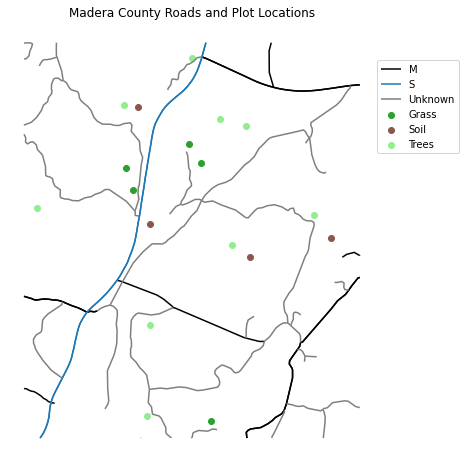

In [17]:
# Create plot
f, ax = plt.subplots(1, 1, figsize=(8, 8))

# Set color maps
road_color_dict = {
    'M': 'k',
    'S': 'tab:blue',
    'Unknown': 'tab:grey'
}
sites_color_dict = {
    'grass': 'tab:green',
    'soil': 'tab:brown',
    'trees': 'lightgreen'
}

# Add road layers to plot
for i, gdf in madera_roads_gdf_cl.groupby('RTTYP'):
    gdf.plot(color=road_color_dict[i], label=i, ax=ax)
    ax.legend()

# Add site locations to plot
for i, gdf in sjer_sites_gdf.groupby('plot_type'):
    gdf.plot(color=sites_color_dict[i], label=i.capitalize(), ax=ax)
    ax.legend()

# Set plot elements
ax.set_axis_off()
ax.set_title("Madera County Roads and Plot Locations")

# Set legend on edge
cord = (1, .7)
ax.legend(loc=cord)

plt.show()

## Take a look at the metadata

What does the RTTYP road type acronyms **M** and **S** stand for? 
Please your answer in the markdown cell BELOW. Use the `tl_2013_06039_roads.shp.xml` file in your data download to help you figure out the answer to this question


M: Common Name
S: State recognized

## Challenge 2: Figure 2 - Roads in Del Norte, Modoc & Siskiyou Counties

Create a plot of roads that are located in: Del Norte, Modoc & Siskiyou Counties. To do this, you will need the following layers:

* Counties in California: `california/CA_Counties/CA_Counties_TIGER2016.shp`
* Roads: `spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp` 

To create this plot, you will need to:

1. Reproject the roads and the county data to `epsg=5070`
2. Select the three counties that you want to work with in the counties dataset. One fast way to do this is using syntax as follows: 

`roads_df[roads_df['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]`

3. Clip the roads data to the boundary of the counties that you wish to look at.
4. Assign each road segment an attribute that identifies it as within each county.

Color the roads in each county using a unique color.

HINT: use the `legend=True` argument in `.plot()` to create a legend.
Because you are only creating a legend for one layer, you can quickly use `.plot()`
rather than `ax.legend()` which is what you used to create the figure above.


### IMPORTANT: 

* Both layers need to the in the SAME coordinate reference system for you to work with them together. REPROJECT both data layers to albers `.to_crs(epsg=5070)`
* Clip the roads to the boundary of the three_counties layer that you created which only contains the 3 selected counties: `"Siskiyou", "Modoc", "Del Norte"`
* To assign each road to its respective county, you will perform a spatial join using `.sjoin()`.
* You will need to redefine the CRS of the roads layer, after the clip, which you can do using something like:

```county_roads.crs = ca_cty_albers.crs```

In the cell below, add the code needed to 

* Open each layer
* Reproject the data 
* Clip and subset the data 

At the end of the cell, be sure to call the clipped roads layer.

In [6]:
# Read in cali counties data as geodf
cali_counties_gdf = gpd.read_file(os.path.join(
    cali_pth, 'CA_Counties', 'CA_Counties_TIGER2016.shp'))

# Read in global roads data as geodf
roads_gdf = gpd.read_file(os.path.join(
    'spatial-vector-lidar',
    'global',
    'ne_10m_roads',
    'ne_10m_roads.shp'))

# Reproject roads and county data
epsg = 5070
cali_county_albers = cali_counties_gdf.to_crs(epsg=epsg)
cali_albers_roads = roads_gdf.to_crs(epsg=epsg)

# Select rows in given counties
counties_filter = cali_county_albers.query(
    'NAME in ("Siskiyou", "Modoc", "Del Norte")')

# Clip roads to boundaries of counties
counties_roads_cl = cali_albers_roads.clip(counties_filter)

# Spatial inner join on filtered county roads and boundaries
counties_filter_roads = gpd.sjoin(
    counties_roads_cl,
    counties_filter,
    how='inner',
    predicate='intersects')

# Redefine CRS
counties_filter_roads.crs = cali_county_albers.crs

counties_filter_roads

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
1135,6,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",395,None,None,None,...,H1,G4020,None,None,None,A,10140955630,745425201,+41.5929185,-120.7183704
48916,7,Road,Road,USA,None,New in version 2.0.0,None,None,None,None,...,H1,G4020,None,None,None,A,10140955630,745425201,+41.5929185,-120.7183704
52,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",299,None,None,None,...,H1,G4020,None,None,None,A,10140955630,745425201,+41.5929185,-120.7183704
48926,7,Road,Road,USA,None,New in version 2.0.0,299,None,None,None,...,H1,G4020,None,None,None,A,10140955630,745425201,+41.5929185,-120.7183704
1003,6,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",395,None,None,None,...,H1,G4020,None,None,None,A,10140955630,745425201,+41.5929185,-120.7183704
49044,7,Road,Secondary Highway,USA,None,New in version 2.0.0,89,None,None,None,...,H1,G4020,None,None,None,A,16261974847,179108278,+41.5879861,-122.5332868
3767,3,Road,Major Highway,USA,None,New in version 2.0.0,5,None,None,None,...,H1,G4020,None,None,None,A,16261974847,179108278,+41.5879861,-122.5332868
3766,3,Road,Major Highway,USA,None,New in version 2.0.0,5,None,None,None,...,H1,G4020,None,None,None,A,16261974847,179108278,+41.5879861,-122.5332868
48954,7,Road,Secondary Highway,USA,None,New in version 2.0.0,3,None,None,None,...,H1,G4020,None,None,None,A,16261974847,179108278,+41.5879861,-122.5332868
48977,7,Road,Secondary Highway,USA,None,New in version 2.0.0,96,None,None,None,...,H1,G4020,None,None,None,A,16261974847,179108278,+41.5879861,-122.5332868


In [7]:
student_three_counties = _
answer_total_bounds = [-2292272.17, 2271444.08, -1965771.03, 2452647.92]
three_counties_points = 0

if isinstance(student_three_counties, gpd.geodataframe.GeoDataFrame):
    print("\u2705 Great! Your clipped object is a GeoDataFrame!")
    three_counties_points += 1
else:
    print("\u274C Oops, your clipped object is not a GeoDataFrame.")

if student_three_counties.crs.to_epsg() == 5070:
    print("\u2705 Great! Your clipped object has the correct CRS!")
    three_counties_points += 2
else:
    print("\u274C Oops, your clipped object does not have the "
          "correct CRS.")

student_total_bounds = [
    round(b, 2) for b in student_three_counties.total_bounds]
if student_total_bounds == answer_total_bounds:
    print("\u2705 Great! Your clipped object has the correct extent.")
    three_counties_points += 2
else:
    print("\u274C Oops, your clipped object does not have the correct "
          "extent")

print("\n \u27A1 You received {} out of 5 points."
      .format(three_counties_points))

three_counties_points

✅ Great! Your clipped object is a GeoDataFrame!
✅ Great! Your clipped object has the correct CRS!
✅ Great! Your clipped object has the correct extent.

 ➡ You received 5 out of 5 points.


5

## Challenge 2b: Figure

In the cell below,  add code to create the figure described above.


Text(0.5, 1.0, 'California Roads in Counties Del Norte, Modoc, & Siskiyou')

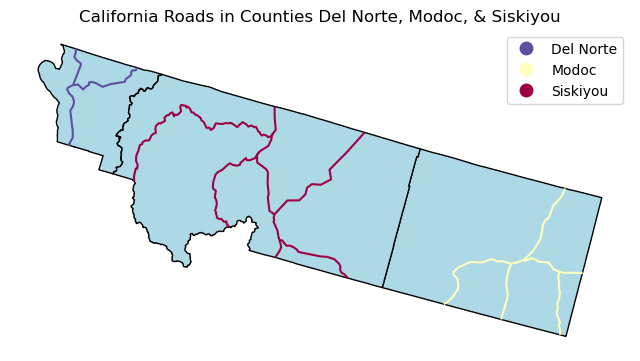

In [8]:
# Set figure
f, ax = plt.subplots(figsize=(8, 8))

# Plot three filtered counties and respective roads
counties_filter.plot(edgecolor='black', facecolor='#ADD8E6', ax=ax)
counties_filter_roads.plot("NAME", cmap='Spectral_r', legend=True, ax=ax)

# Set plot elements
ax.set_axis_off()
ax.set_title("California Roads in Counties Del Norte, Modoc, & Siskiyou")

## Challenge 3:  Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California

Create a dataframe that shows the total length of road in these counties used in plot 2: Siskiyou, Modoc, and Del Norte. To calculate this, use the data you created for plot 2.

To calculate length of each line in your geodataframe, you can use the syntax `gdf.length`. Create a new column **named length** using the syntax:

`gdf["length"] = gdf.length`

You can summarize the data to calculate total length using pandas `.groupby()` on the county column name.

Note: you can use: `pd.options.display.float_format = '{:.4f}'.format` if you'd like to turn off scientific notation for your outputs.

It should look something like this:


||length|
|----|----|
|NAME|| 
|Del Norte| road length here|
|Modoc| road length here|
|Siskiyou| road length here|


At the end of the cell, call the dataframe object

In [9]:
# Assign length of road to new col
counties_filter_roads['length'] = counties_filter_roads.length

# Groupby name and length col
counties_filter_roads.groupby('NAME').agg({'length': 'sum'})

,length
NAME,
Del Norte,121307.565363
Modoc,245029.146972
Siskiyou,472427.949970


In [10]:
# DO NOT MODIFY THIS CELL
# Test that the cali_roads_summary is of type dataframe and named correctly

# Let's make sure you created an object with the correct name and of the correct type above!

student_length_dataframe = _

length_points = 0

if len(student_length_dataframe) == 3:
    print("\u2705 Correct number of entries in the dataframe, good job!")
    length_points += 2
else:
    print("\u274C Incorrect amount of entries in the dataframe.")

if student_length_dataframe.length.dtype == 'float':
    print("\u2705 Length column has the correct datatype!")
    length_points += 2
else:
    print("\u274C Length column does not have the correct datetype.")

if round(student_length_dataframe.length.sum(), 2) == 838764.66:
    length_points += 6
    print("\u2705 Great! The summary roads data are correct!")
else:
    print("\u274C Oops, the roads summary data are not correct.")

print("\n \u27A1 You received {} out of 10 points.".format(
    length_points))
length_points

✅ Correct number of entries in the dataframe, good job!
✅ Length column has the correct datatype!
✅ Great! The summary roads data are correct!

 ➡ You received 10 out of 10 points.


10

## Challenge 4: Plot 3 - Global  Estimated Population 

Create a plot of quantile maps of the sum of global estimated population by region. To do this, you will use the  natural earth data of global political boundaries. You should have downloaded the country data from Natural Earth Data above.

Preprocess your data by: 
  1. Open up the Natural Earth data using `gpd.read_file()`
  2. Subset the data to include the following columns: `["REGION_WB", "POP_EST", 'geometry']`
  3. Dissolve the data by region (`REGION_WB`) column and aggregate by `sum`. 
      * HINT: you can provide the aggfunc= argument with a `[list]` of function names in quotes and it will summarize numeric columns using each function.
    
Call your final dissolved `GeoDataFrame` at the end of the cell.

In [11]:
# Read in country data as geodf
country_gdf = gpd.read_file(country_data)

# Select desired cols
countries_subset = country_gdf[['REGION_WB', 'POP_EST', 'geometry']]

# Dissolve on region and aggregate by sum
region_total_pop = countries_subset.dissolve(
    by='REGION_WB', aggfunc='sum')

region_total_pop

,geometry,POP_EST
REGION_WB,,
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03
East Asia & Pacific,"MULTIPOLYGON (((-179.91737 -16.50178, -180.000...",2.325561e+09
Europe & Central Asia,"MULTIPOLYGON (((-53.77852 2.37670, -54.08806 2...",9.209389e+08
Latin America & Caribbean,"MULTIPOLYGON (((-71.37525 -17.77380, -71.46204...",6.449377e+08
Middle East & North Africa,"MULTIPOLYGON (((-11.93722 23.37459, -12.87422 ...",4.551668e+08
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",3.658288e+08
South Asia,"MULTIPOLYGON (((81.21802 6.19714, 80.34836 5.9...",1.835246e+09
Sub-Saharan Africa,"MULTIPOLYGON (((9.30561 1.16091, 9.64916 2.283...",1.106408e+09


In [12]:
# DO NOT MODIFY THIS CELL
student_dissolve_dataframe = _

dissolve_points = 0

if len(student_dissolve_dataframe) == 8:
    print("\u2705 Correct number of entries in the dataframe, good job!")
    dissolve_points += 3
else:
    print("\u274C Incorrect amount of entries in the dataframe.")

if isinstance(student_dissolve_dataframe, gpd.GeoDataFrame):
    print("\u2705 Data is stored in a GeoDataFrame, good job!")
    dissolve_points += 2
else:
    print("\u274C Data is not stored in a GeoDataFrame.")

if round(student_dissolve_dataframe.POP_EST.mean(), 0) == 956761503:
    print("\u2705 Correct population values, good job!")
    dissolve_points += 5
else:
    print("\u274C Data does not have the correct values.")

print("\n \u27A1 You received {} out of 10 points.".format(
    dissolve_points))
dissolve_points

✅ Correct number of entries in the dataframe, good job!
✅ Data is stored in a GeoDataFrame, good job!
✅ Correct population values, good job!

 ➡ You received 10 out of 10 points.


10

## Create a chloropleth plot of population by region

You can control which value is represented by the color scale using the `column` parameter of the GeoDataFrame.plot() method.

Check out the [geopandas User Guide](https://geopandas.org/en/stable/docs/user_guide/mapping.html) for more details on making this *exact* plot.


Text(0.5, 1.0, 'Estimated Global Population')

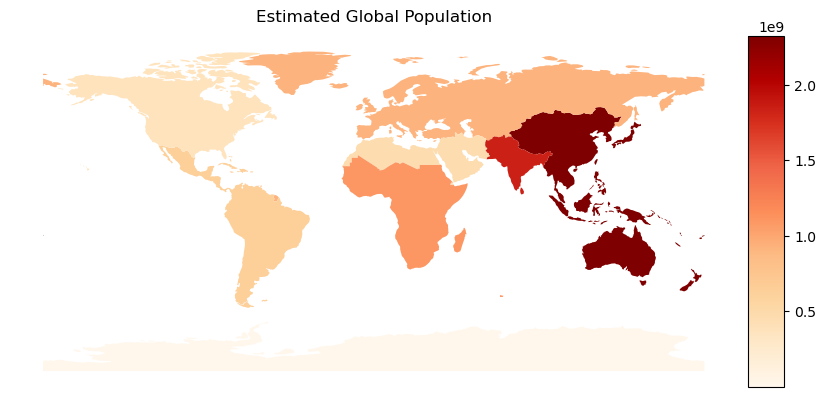

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set figure
f, ax = plt.subplots(figsize=(10, 6))

# Grabbed these lines from link above to modify legend size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot region population totals
region_total_pop.plot('POP_EST',
                      cmap='OrRd',
                      legend=True,
                      cax=cax,
                      ax=ax)

# Set plot elements
ax.set_axis_off()
ax.set_title('Estimated Global Population', pad=10)

## Do not modify this cell (10 points)

* Here we will grade pep8 format and imports listed at the top following pep 8 conventions.
* Notebook begins with cell [1] and runs without modifications. 
* Be sure that your code can be run on any operating system. This means that:
    * the data should be downloaded in the notebook to ensure it's reproducible
    * all paths should be created dynamically using the os package to ensure that they work across operating systems